In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler


In [2]:
#!pip install pandas_datareader

In [3]:
#!pip install yfinance

In [4]:
# import yfinance as yf
# import pandas as pd
# from datetime import datetime

# # Define the list of ticker symbols and their corresponding company names
# tickers = {'AAPL': 'Apple', 'AMZN': 'Amazon', 'GOOGL': 'Google', 'MSFT': 'Microsoft'}

# # Define the time range
# start_date = '2017-01-01'
# end_date = '2024-10-01'

# # Create an empty DataFrame to store all data
# combined_data = pd.DataFrame()

# # Download the data for each ticker and add company name
# for ticker, company_name in tickers.items():
#     print(f"Downloading data for {ticker} ({company_name})")
#     df = yf.download(ticker, start=start_date, end=end_date)

#     # Add the company_name column
#     df['company_name'] = company_name

#     # Reset index to make the 'Date' column part of the DataFrame
#     df = df.reset_index()

#     # Append to the combined_data DataFrame
#     combined_data = pd.concat([combined_data, df])

# # Save the raw data to a CSV file
# combined_data.to_csv('combined_stock_data_raw.csv', index=False)

# # print("Raw data saved to 'combined_stock_data_raw.csv'")


In [5]:
print("Raw data saved to 'combined_stock_data_raw.csv'")

Raw data saved to 'combined_stock_data_raw.csv'


In [6]:
# Load the saved raw CSV data
df = pd.read_csv("C:\\Users\\Acer\\Downloads\\combined_stock_data_raw.csv")

df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921551   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891417   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329485   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579811   

      Volume company_name  
0  115127600        Apple  
1   84472400        Apple  
2   88774400        Apple  
3  127007600        Apple  
4  134247600        Apple

In [7]:
df.shape

(7792, 8)

In [8]:
# Step 1: Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 2: Drop rows with missing values
df.dropna(inplace=True)

# Check again to ensure there are no missing values
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64
Missing values after cleaning:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'company_name'],
      dtype='object')

In [10]:
df.shape

(7792, 8)

In [11]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  7792.000000  7792.000000  7792.000000  7792.000000  7792.000000   
mean    133.275516   134.674607   131.845003   133.312508   131.438005   
std      83.831733    84.577797    83.010298    83.830573    83.168273   
min      28.950001    29.082500    28.690001    29.004999    26.891417   
25%      68.867502    69.618998    68.047503    68.937502    66.628965   
50%     117.114998   118.730000   115.721249   117.305000   115.884998   
75%     167.097500   168.640873   165.159996   166.822502   165.959476   
max     467.000000   468.350006   464.459991   467.559998   466.718781   

             Volume  
count  7.792000e+03  
mean   6.037112e+07  
std    4.650072e+07  
min    7.425600e+06  
25%    2.726578e+07  
50%    4.628900e+07  
75%    7.875268e+07  
max    4.479400e+08

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7792 entries, 0 to 7791
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          7792 non-null   object 
 1   Open          7792 non-null   float64
 2   High          7792 non-null   float64
 3   Low           7792 non-null   float64
 4   Close         7792 non-null   float64
 5   Adj Close     7792 non-null   float64
 6   Volume        7792 non-null   int64  
 7   company_name  7792 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 487.1+ KB


In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


## Descriptive statistics

In [15]:
# Descriptive statistics for the numerical columns
descriptive_stats = df.describe()
print(descriptive_stats)


              Open         High          Low        Close    Adj Close  \
count  7792.000000  7792.000000  7792.000000  7792.000000  7792.000000   
mean    133.275516   134.674607   131.845003   133.312508   131.438005   
std      83.831733    84.577797    83.010298    83.830573    83.168273   
min      28.950001    29.082500    28.690001    29.004999    26.891417   
25%      68.867502    69.618998    68.047503    68.937502    66.628965   
50%     117.114998   118.730000   115.721249   117.305000   115.884998   
75%     167.097500   168.640873   165.159996   166.822502   165.959476   
max     467.000000   468.350006   464.459991   467.559998   466.718781   

             Volume  
count  7.792000e+03  
mean   6.037112e+07  
std    4.650072e+07  
min    7.425600e+06  
25%    2.726578e+07  
50%    4.628900e+07  
75%    7.875268e+07  
max    4.479400e+08  


## Exploratory Data Analysis (EDA)

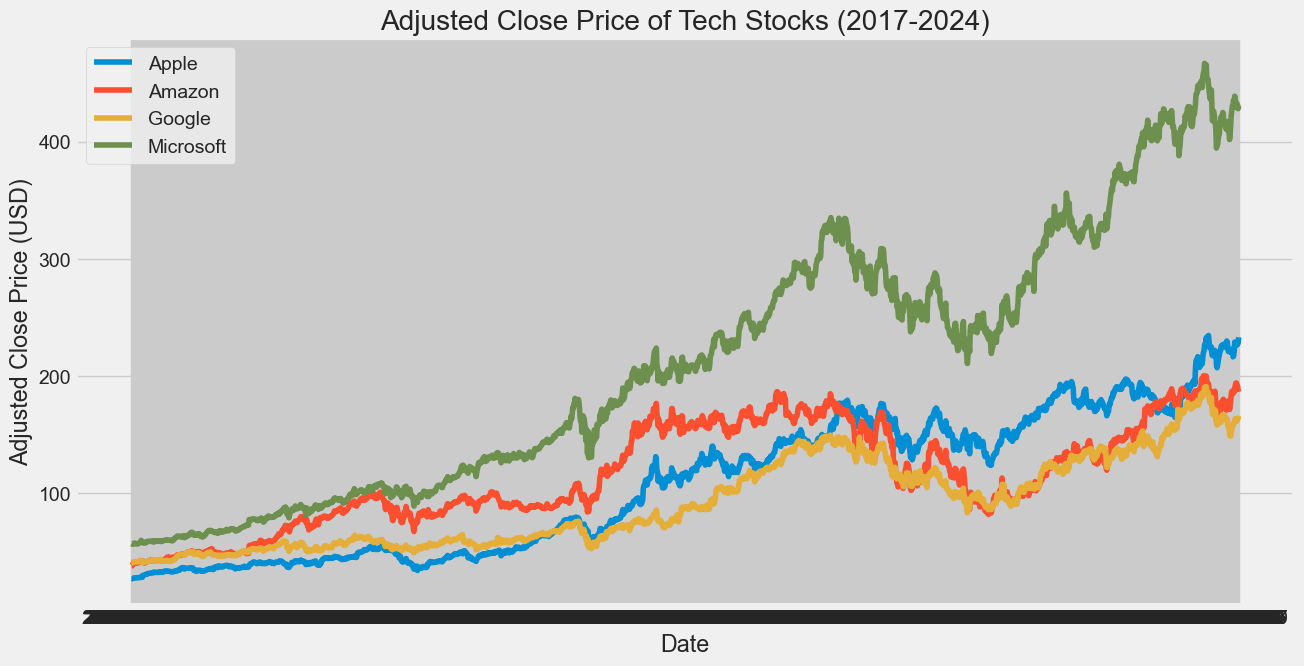

In [17]:
plt.figure(figsize=(14,7))
for company in df['company_name'].unique():
    company_data = df[df['company_name'] == company]
    plt.plot(company_data['Date'], company_data['Adj Close'], label=company)

plt.title('Adjusted Close Price of Tech Stocks (2017-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#### Daily Stock Price Changes (Daily Returns)

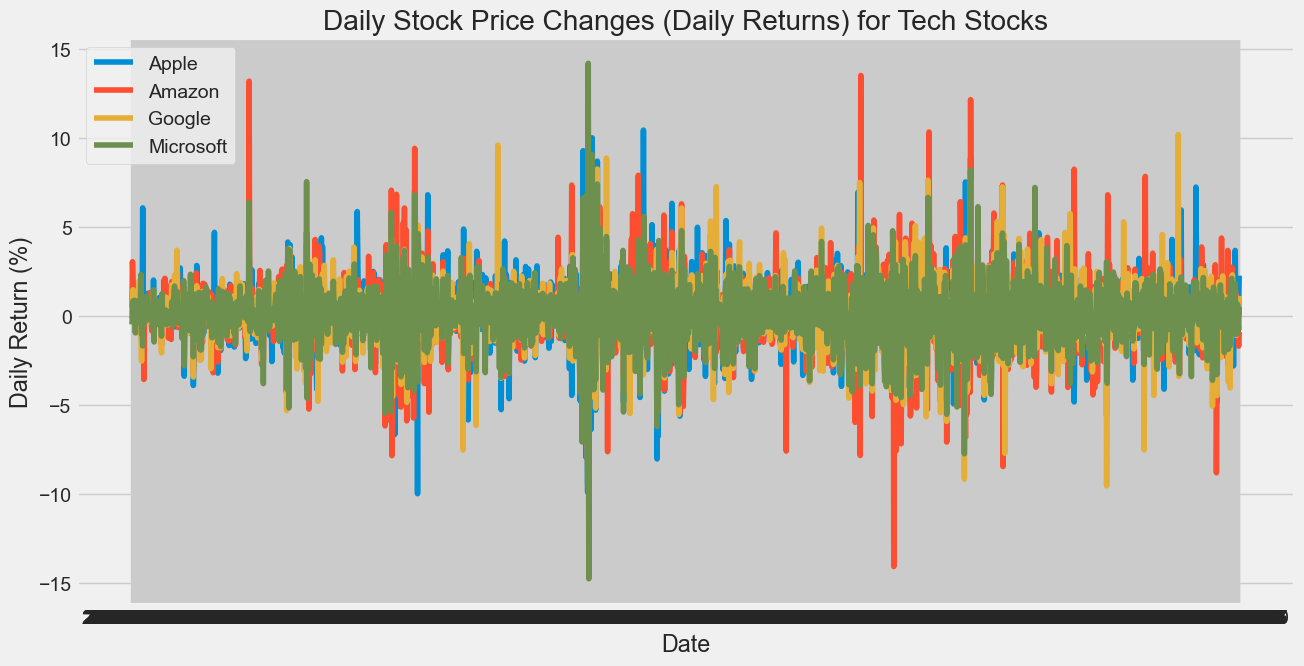

In [19]:
# Calculate daily returns (percentage change)
df['Daily Return'] = df.groupby('company_name')['Adj Close'].pct_change() * 100

# Plot the daily returns for each company
plt.figure(figsize=(14,7))
for company in df['company_name'].unique():
    company_data = df[df['company_name'] == company]
    plt.plot(company_data['Date'], company_data['Daily Return'], label=company)

plt.title('Daily Stock Price Changes (Daily Returns) for Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()


#### 50-Day and 200-Day Moving Averages (Trend)

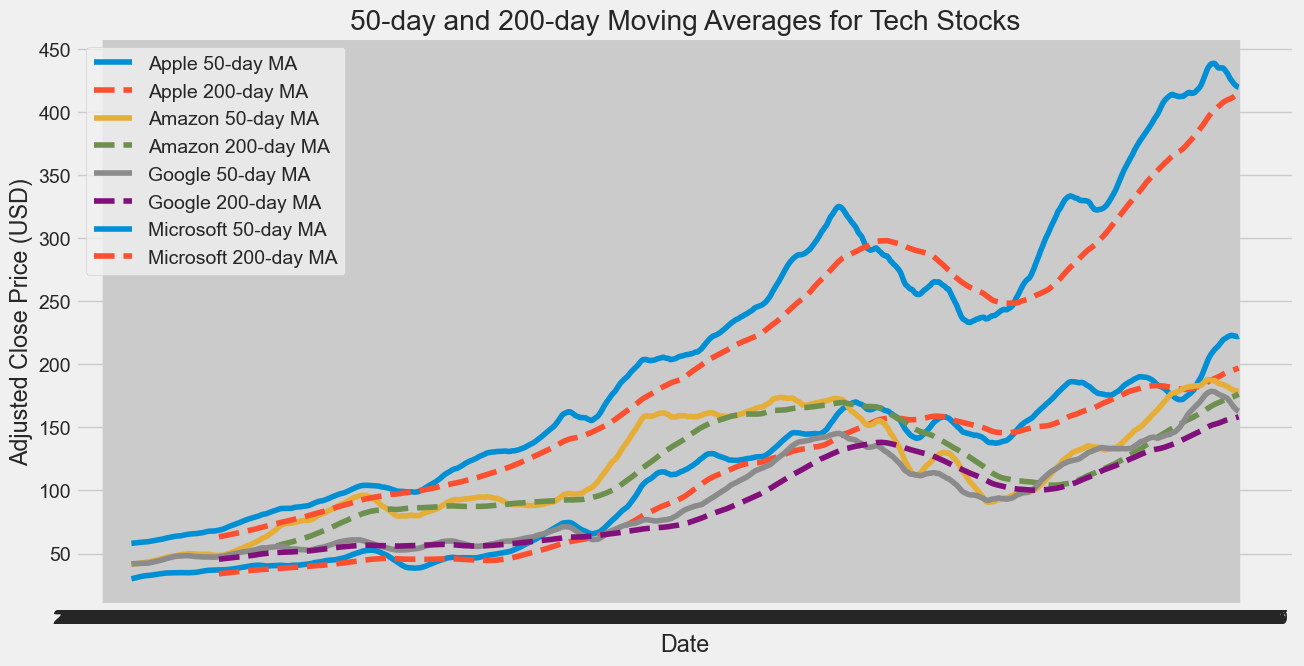

In [21]:
# Calculate the 50-day and 200-day moving averages
df['50-day MA'] = df.groupby('company_name')['Adj Close'].rolling(window=50).mean().reset_index(0, drop=True)
df['200-day MA'] = df.groupby('company_name')['Adj Close'].rolling(window=200).mean().reset_index(0, drop=True)

plt.figure(figsize=(14,7))
for company in df['company_name'].unique():
    company_data = df[df['company_name'] == company]
    plt.plot(company_data['Date'], company_data['50-day MA'], label=f'{company} 50-day MA')
    plt.plot(company_data['Date'], company_data['200-day MA'], label=f'{company} 200-day MA', linestyle='--')

plt.title('50-day and 200-day Moving Averages for Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Stock Price Volatility (Rolling Standard Deviation)

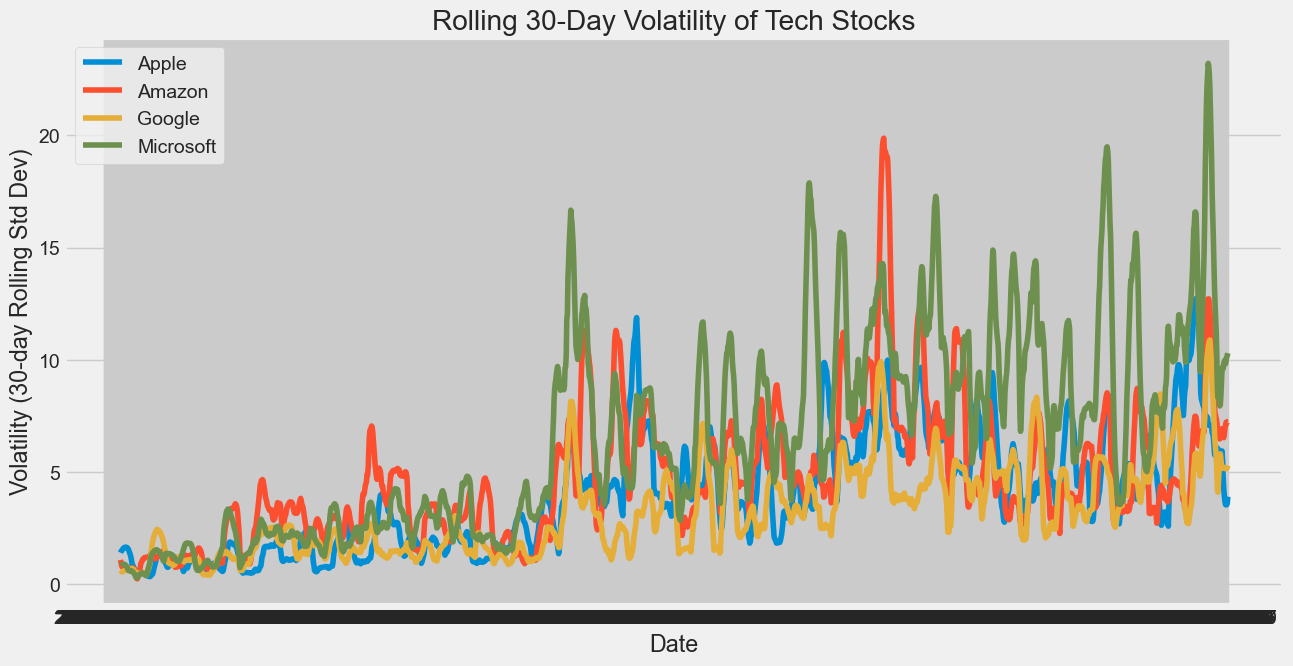

In [23]:
# Calculate rolling standard deviation (volatility) with a window of 30 days
df['Volatility'] = df.groupby('company_name')['Adj Close'].rolling(window=30).std().reset_index(0, drop=True)

plt.figure(figsize=(14,7))
for company in df['company_name'].unique():
    company_data = df[df['company_name'] == company]
    plt.plot(company_data['Date'], company_data['Volatility'], label=company)

plt.title('Rolling 30-Day Volatility of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Volatility (30-day Rolling Std Dev)')
plt.legend()
plt.grid(True)
plt.show()


 #### Daily Stock Prices (Adjusted Close) for Each Company

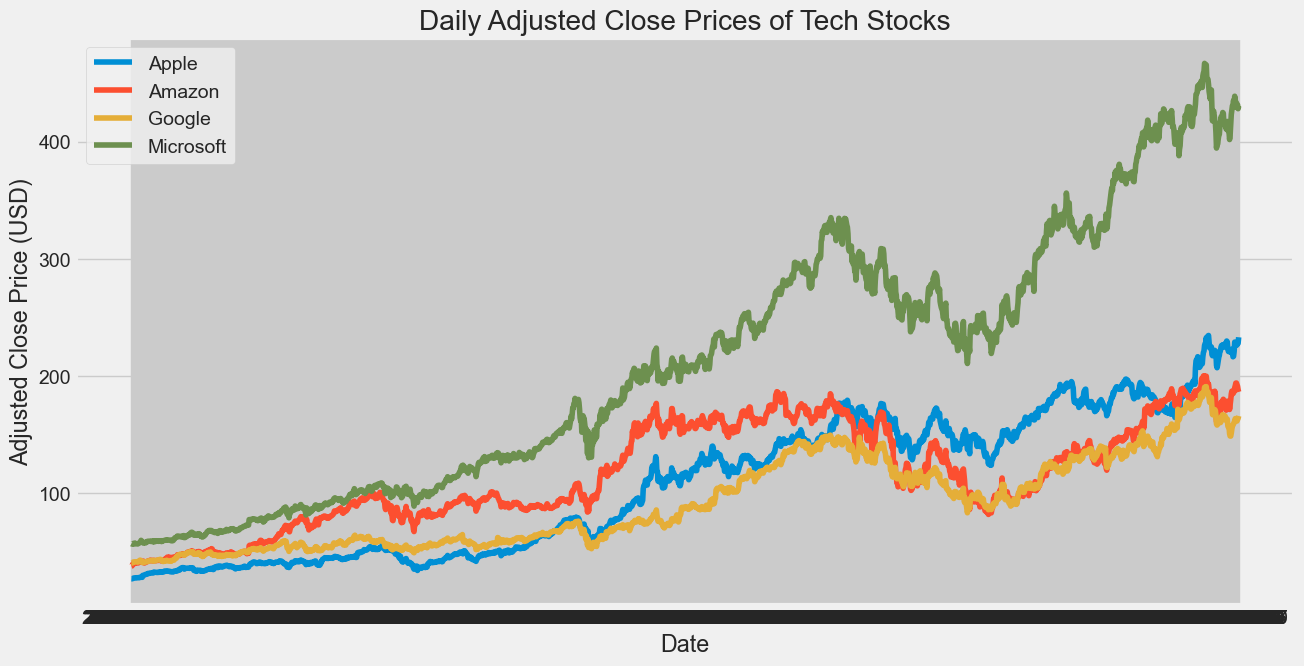

In [25]:
plt.figure(figsize=(14,7))
for company in df['company_name'].unique():
    company_data = df[df['company_name'] == company]
    plt.plot(company_data['Date'], company_data['Adj Close'], label=company)

plt.title('Daily Adjusted Close Prices of Tech Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


### Correlation Heatmap for Tech Stocks

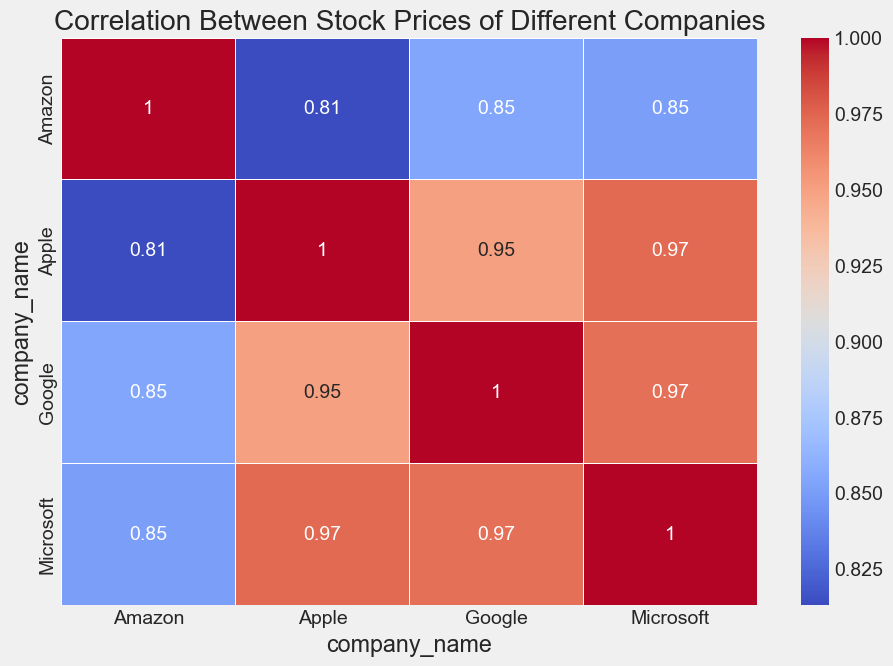

In [27]:
# Pivot the data to have stock prices as columns
pivot_df = df.pivot_table(values='Adj Close', columns='company_name', index='Date')

# Calculate the correlation between stock prices
correlation_matrix = pivot_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Stock Prices of Different Companies')
plt.show()


### Boxplot of Stock Prices Distribution for Each Company

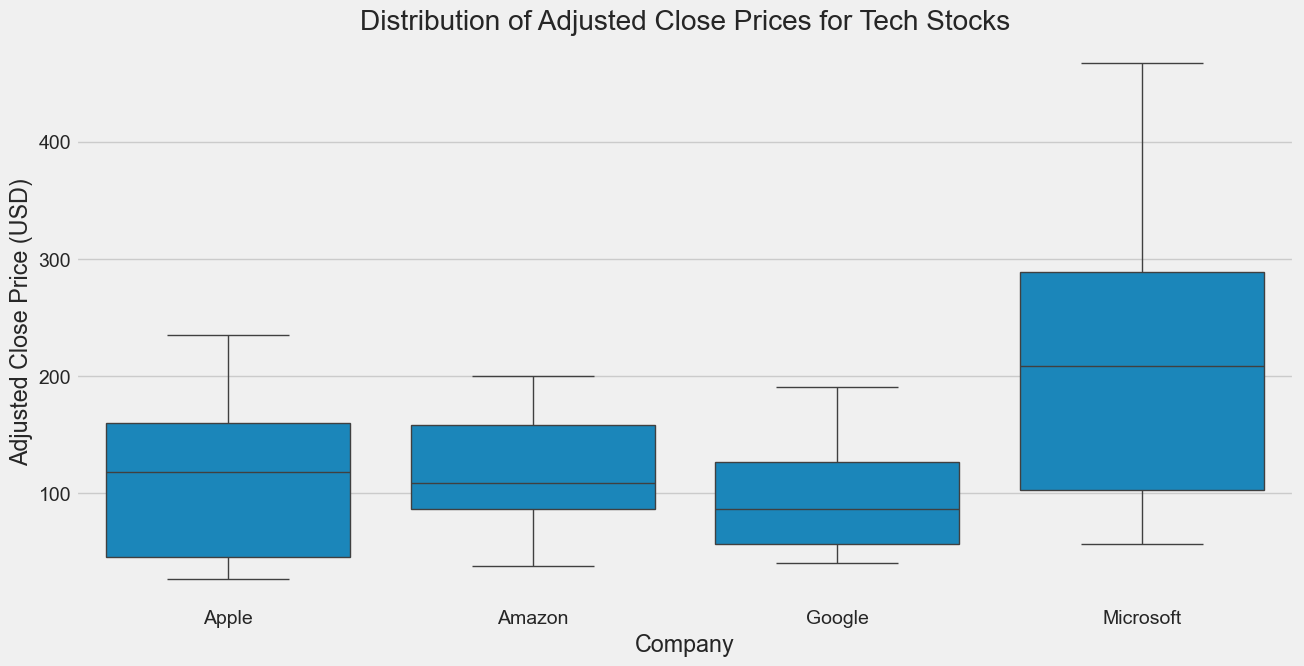

In [29]:
plt.figure(figsize=(14,7))
sns.boxplot(x='company_name', y='Adj Close', data=df)
plt.title('Distribution of Adjusted Close Prices for Tech Stocks')
plt.xlabel('Company')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()


### Annual Returns (Yearly Stock Returns)

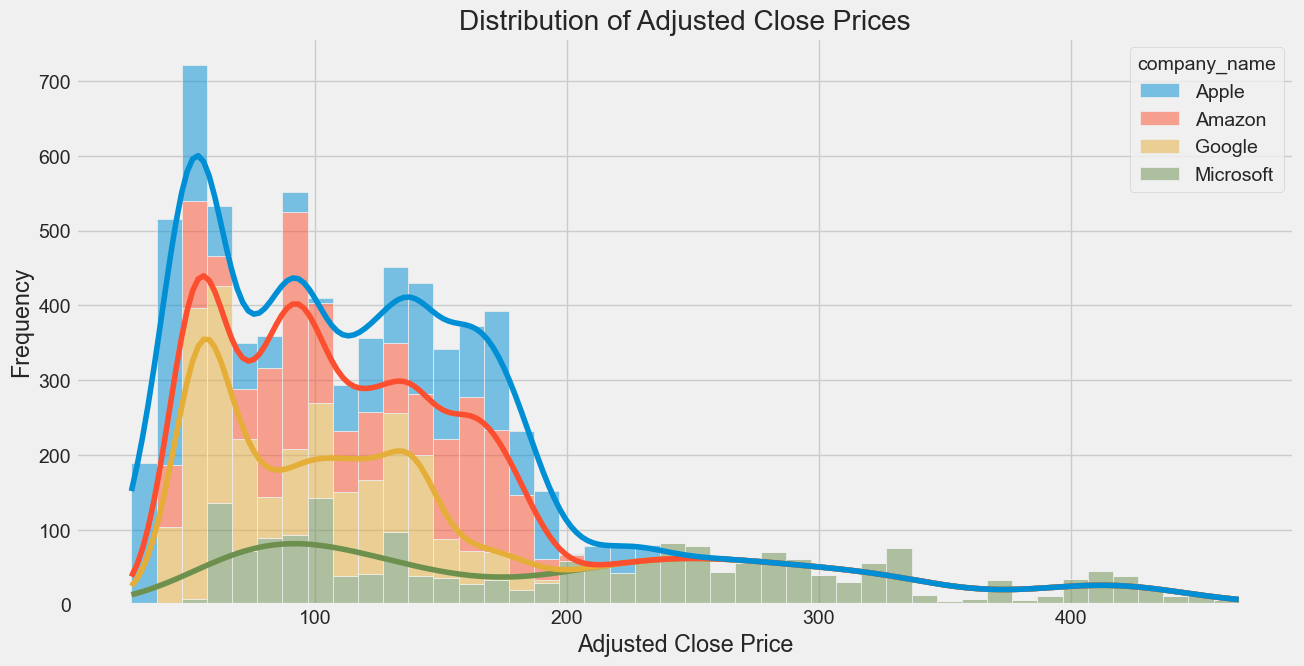

In [31]:
# Histogram for 'Adj Close' prices
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='Adj Close', hue='company_name', kde=True, multiple="stack")
plt.title('Distribution of Adjusted Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


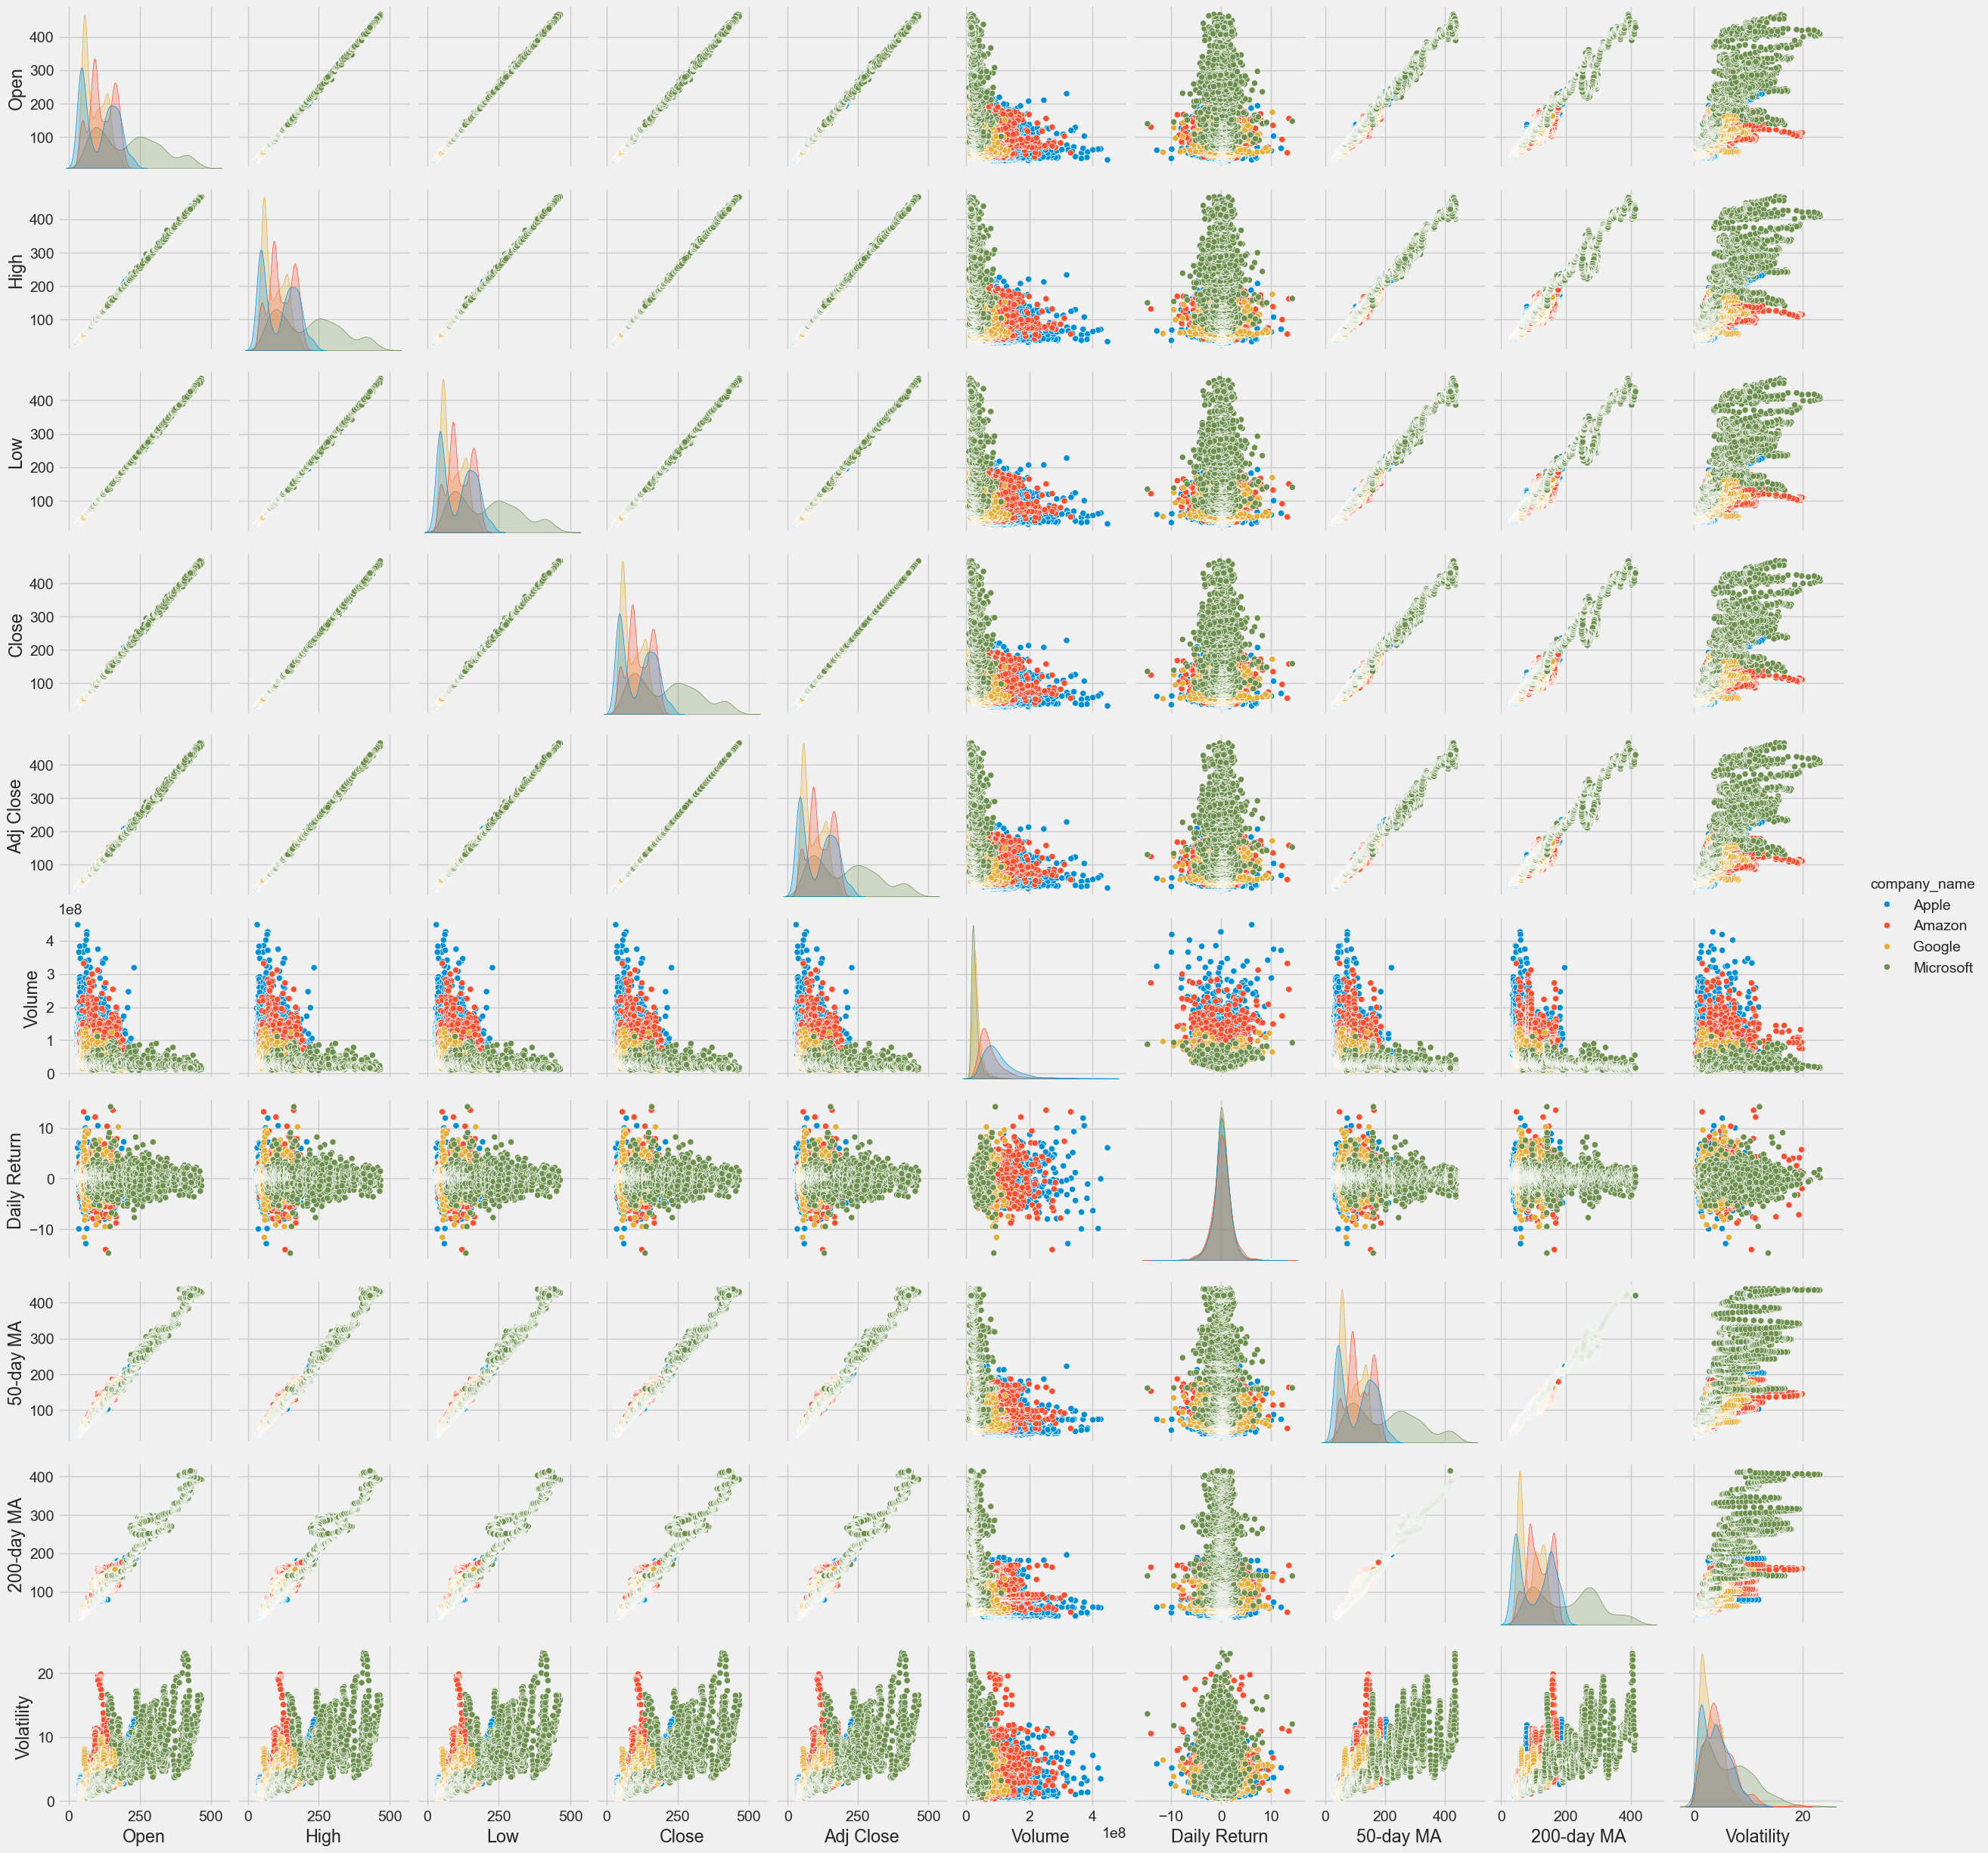

In [32]:
# Pair plot for multi-variable analysis
sns.pairplot(df, hue='company_name')
plt.show()



In [33]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921551   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891417   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329485   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579811   

      Volume company_name  Daily Return  50-day MA  200-day MA  Volatility  
0  115127600        Apple           NaN        NaN         NaN         NaN  
1   84472400        Apple     -0.111933        NaN         NaN         NaN  
2   88774400        Apple      0.508538        NaN         NaN         NaN  
3  127007600        Apple      1.114820        NaN         NaN         NaN  
4  134247600        Apple      0.915956        NaN         NaN         NaN

In [34]:
columns_to_drop = ['Daily Return', '50-day MA', '200-day MA', 'Volatility']

# Drop the columns from df and assign the result to data
data = df.drop(columns=columns_to_drop)

# Convert 'Date' column to datetime format in the data DataFrame
data['Date'] = pd.to_datetime(data['Date'])

# List of companies
companies = ["Apple", "Amazon", "Google", "Microsoft"]

# Dictionary to store results for each company
results = {}

In [35]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921551   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891417   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329485   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579811   

      Volume company_name  Daily Return  50-day MA  200-day MA  Volatility  
0  115127600        Apple           NaN        NaN         NaN         NaN  
1   84472400        Apple     -0.111933        NaN         NaN         NaN  
2   88774400        Apple      0.508538        NaN         NaN         NaN  
3  127007600        Apple      1.114820        NaN         NaN         NaN  
4  134247600        Apple      0.915956        NaN         NaN         NaN

In [36]:
data.head()

Date       Open       High        Low      Close  Adj Close  \
0 2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921551   
1 2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891417   
2 2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   
3 2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329485   
4 2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579811   

      Volume company_name  
0  115127600        Apple  
1   84472400        Apple  
2   88774400        Apple  
3  127007600        Apple  
4  134247600        Apple

In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'company_name', 'Daily Return', '50-day MA', '200-day MA',
       'Volatility'],
      dtype='object')

### Apply Scaling - MinMaxScaler

In [39]:
# Prepare scalers and data for each company
for company in companies:
    company_data = data[data['company_name'] == company].copy()
    company_data.set_index('Date', inplace=True)
    company_data = company_data[['Close']]

    # Scale the data for LSTM
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(company_data)

    # Store the processed data and scaler for each company
    results[company] = {
        'original_data': company_data,
        'scaled_data': scaled_data,
        'scaler': scaler
    }


In [40]:
df.head()

Date       Open       High        Low      Close  Adj Close  \
0  2017-01-03  28.950001  29.082500  28.690001  29.037500  26.921551   
1  2017-01-04  28.962500  29.127501  28.937500  29.004999  26.891417   
2  2017-01-05  28.980000  29.215000  28.952499  29.152500  27.028170   
3  2017-01-06  29.195000  29.540001  29.117500  29.477501  27.329485   
4  2017-01-09  29.487499  29.857500  29.485001  29.747499  27.579811   

      Volume company_name  Daily Return  50-day MA  200-day MA  Volatility  
0  115127600        Apple           NaN        NaN         NaN         NaN  
1   84472400        Apple     -0.111933        NaN         NaN         NaN  
2   88774400        Apple      0.508538        NaN         NaN         NaN  
3  127007600        Apple      1.114820        NaN         NaN         NaN  
4  134247600        Apple      0.915956        NaN         NaN         NaN

## Modelling

### 1. Sequence Generation for LSTM

In [43]:
# Define sequence length
seq_length = 60

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [44]:
# Create sequences for each company and split into train/test sets
for company in companies:
    X, y = create_sequences(results[company]['scaled_data'], seq_length)

    # Split data into train and test sets (80/20 split)
    split = int(0.8 * len(X))
    results[company]['X_train'], results[company]['X_test'] = X[:split], X[split:]
    results[company]['y_train'], results[company]['y_test'] = y[:split], y[split:]


In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [46]:
# Train and evaluate LSTM model for each company
for company in companies:
    model = build_lstm_model((seq_length, 1))

    # Train the model
    model.fit(results[company]['X_train'], results[company]['y_train'], epochs=100, batch_size=64, verbose=1)

    # Store the trained model
    results[company]['lstm_model'] = model


Epoch 1/100


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0242
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0018
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 6.2598e-04
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.3594e-04
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.6352e-04
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.6840e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.7259e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.6456e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 4.6119e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.3049e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.5019e-04
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.2590e-04
Epoch 13/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.1311e-04
Epoch 14/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 3.7545e-04
Epoch 15/100
24/24 ━━

Make Predictions with LSTM and Invert Scaling

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions for each company and calculate evaluation metrics
for company in companies:
    model = results[company]['lstm_model']

    # Predictions
    train_pred = model.predict(results[company]['X_train'])
    test_pred = model.predict(results[company]['X_test'])

    # Invert scaling
    train_pred = results[company]['scaler'].inverse_transform(train_pred)
    y_train_actual = results[company]['scaler'].inverse_transform(results[company]['y_train'].reshape(-1, 1))
    test_pred = results[company]['scaler'].inverse_transform(test_pred)
    y_test_actual = results[company]['scaler'].inverse_transform(results[company]['y_test'].reshape(-1, 1))

    # Store predictions and actual values
    results[company]['lstm_train_pred'] = train_pred
    results[company]['lstm_test_pred'] = test_pred
    results[company]['y_train_actual'] = y_train_actual
    results[company]['y_test_actual'] = y_test_actual

    # Calculate evaluation metrics for training data
    train_mae = mean_absolute_error(y_train_actual, train_pred)
    train_mse = mean_squared_error(y_train_actual, train_pred)
    train_rmse = np.sqrt(train_mse)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test_actual, test_pred)
    test_mse = mean_squared_error(y_test_actual, test_pred)
    test_rmse = np.sqrt(test_mse)

    # Print the metrics for each company
    print(f"Company: {company}")
    print(f"Training Data - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}")
    print(f"Test Data - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}")
    print("-" * 50)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Company: Apple
Training Data - MAE: 1.6600001227776735, MSE: 5.984430214540371, RMSE: 2.446309509146455
Test Data - MAE: 3.859066473743904, MSE: 21.671656314388958, RMSE: 4.655282624544825
--------------------------------------------------
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Company: Amazon
Training Data - MAE: 2.083646660608961, MSE: 8.31302418354467, RMSE: 2.8832315521901237
Test Data - MAE: 2.735697246733166, MSE: 12.055876418578137, RMSE: 3.4721573147796945
--------------------------------------------------
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Company: Google
Training Data - MAE: 1.297682877092172, MSE: 3.6177662045819012, RMSE: 1.902042640053556
Test Data - MAE: 1.8701486940737124, MSE: 7.178532434240746, RMSE: 2.679278342061673
--------------------------------------------------
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/ste

In [49]:
# Calculate evaluation metrics for LSTM model for each company
for company in companies:
    lstm_mse = mean_squared_error(results[company]['y_test_actual'], results[company]['lstm_test_pred'])
    lstm_mae = mean_absolute_error(results[company]['y_test_actual'], results[company]['lstm_test_pred'])

    results[company]['lstm_mse'] = lstm_mse
    results[company]['lstm_mae'] = lstm_mae


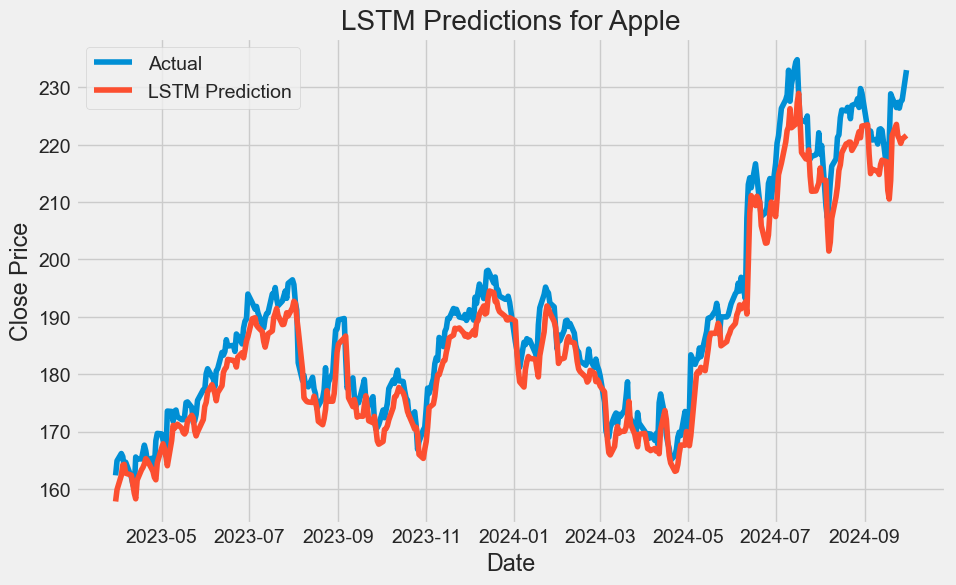

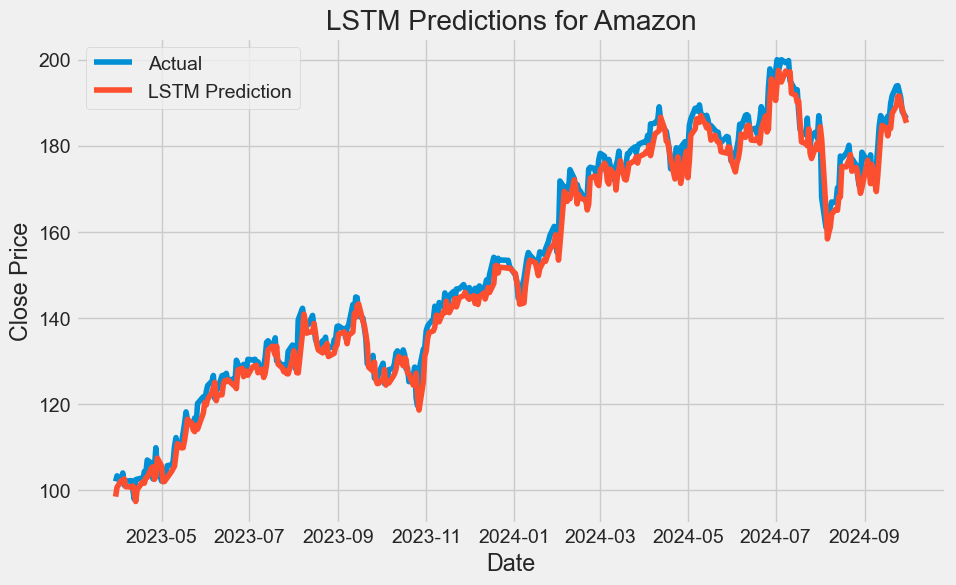

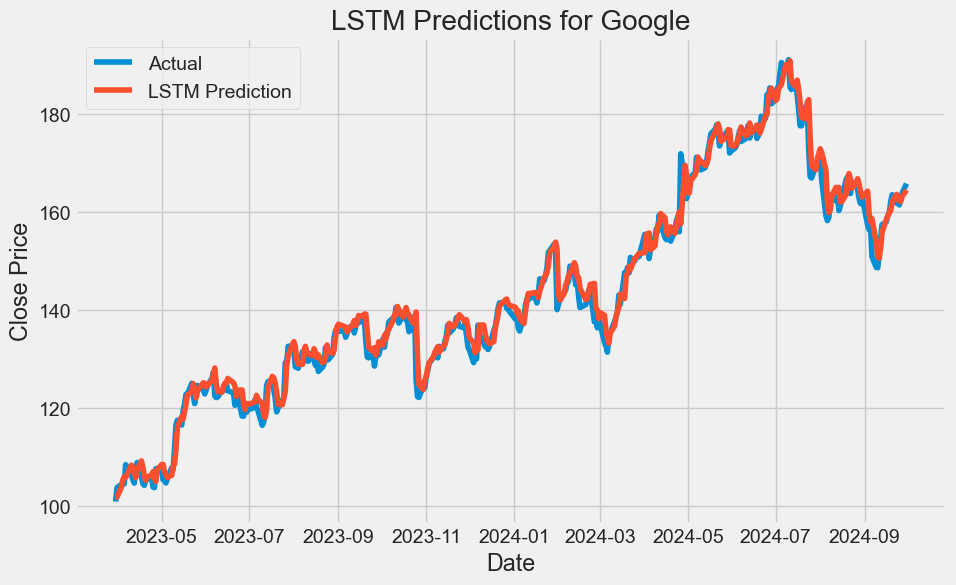

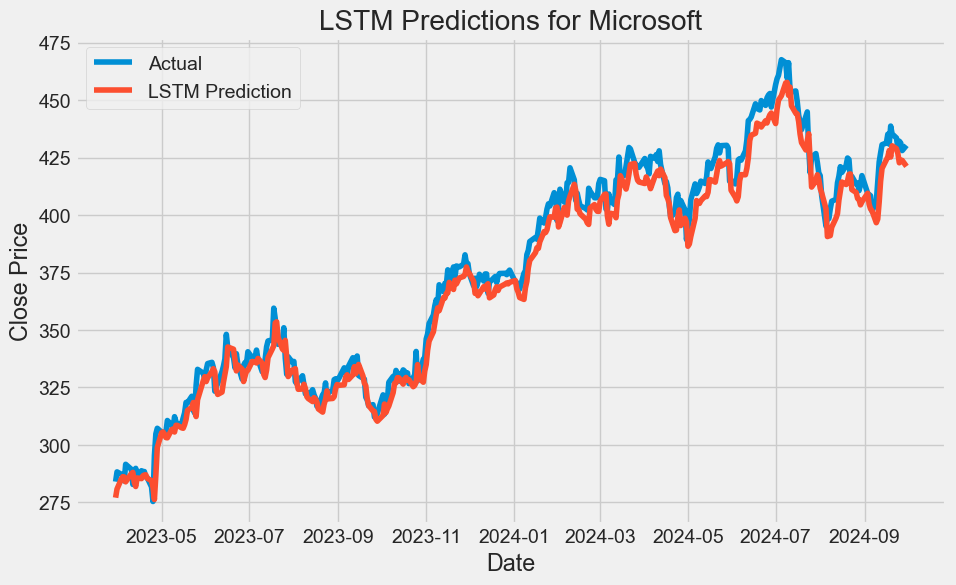

In [50]:
# Plot LSTM predictions for each company
for company in companies:
    plt.figure(figsize=(10, 6))
    plt.plot(results[company]['original_data'].index[-len(results[company]['y_test_actual']):], results[company]['y_test_actual'], label='Actual')
    plt.plot(results[company]['original_data'].index[-len(results[company]['y_test_actual']):], results[company]['lstm_test_pred'], label='LSTM Prediction')
    plt.title(f'LSTM Predictions for {company}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


## 2. ARIMA Model

In [52]:
# Suppress specific warnings
warnings.filterwarnings('ignore', module='statsmodels')

# Define and evaluate ARIMA model for each company
for company in companies:
    # Check if company data exists in 'results'
    company_data = results.get(company, {}).get('original_data', {}).get('Close', None)

    # Skip to the next company if data is missing
    if company_data is None:
        print(f"Data for {company} is missing. Skipping this company.")
        continue

    # Manually split data into training and test sets (80% train, 20% test)
    train_size = int(len(company_data) * 0.8)
    y_train_actual = company_data[:train_size]
    y_test_actual = company_data[train_size:]

    # Define and train ARIMA model
    arima_order = (5, 1, 0)  # ARIMA(p,d,q) order
    arima_model = ARIMA(y_train_actual, order=arima_order)
    arima_result = arima_model.fit()

    print(f"ARIMA model trained for {company} with order {arima_order}")

    # Predictions for training and test data
    arima_train_pred = arima_result.predict(start=0, end=len(y_train_actual) - 1, typ='levels')
    arima_test_pred = arima_result.predict(start=len(y_train_actual),
                                           end=len(company_data) - 1, typ='levels')

    # Store predictions in results dictionary
    results[company] = results.get(company, {})
    results[company]['arima_train_pred'] = arima_train_pred
    results[company]['arima_test_pred'] = arima_test_pred

    # Evaluation metrics for training data
    train_mae = mean_absolute_error(y_train_actual, arima_train_pred)
    train_mse = mean_squared_error(y_train_actual, arima_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Evaluation metrics for test data
    test_mae = mean_absolute_error(y_test_actual, arima_test_pred)
    test_mse = mean_squared_error(y_test_actual, arima_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Store evaluation metrics
    results[company]['arima_train_mae'] = train_mae
    results[company]['arima_train_mse'] = train_mse
    results[company]['arima_train_rmse'] = train_rmse
    results[company]['arima_test_mae'] = test_mae
    results[company]['arima_test_mse'] = test_mse
    results[company]['arima_test_rmse'] = test_rmse

    # Print the evaluation metrics for each company
    print(f"Company: {company}")
    print(f"Training Data - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}")
    print(f"Test Data - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}")
    print("-" * 50)



ARIMA model trained for Apple with order (5, 1, 0)
Company: Apple
Training Data - MAE: 1.3242167632136415, MSE: 4.7135433136313685, RMSE: 2.1710696243168637
Test Data - MAE: 37.78094772157057, MSE: 1795.1779724938538, RMSE: 42.36954062169961
--------------------------------------------------
ARIMA model trained for Amazon with order (5, 1, 0)
Company: Amazon
Training Data - MAE: 1.6761178611312255, MSE: 7.1904817549282045, RMSE: 2.6815073661894355
Test Data - MAE: 59.266573306084695, MSE: 4338.620249598851, RMSE: 65.86820363118196
--------------------------------------------------
ARIMA model trained for Google with order (5, 1, 0)
Company: Google
Training Data - MAE: 1.0996330453428056, MSE: 3.739759762740137, RMSE: 1.9338458477190308
Test Data - MAE: 50.35207998447379, MSE: 3026.25612370078, RMSE: 55.01141812115717
--------------------------------------------------
ARIMA model trained for Microsoft with order (5, 1, 0)
Company: Microsoft
Training Data - MAE: 2.3760830505214576, MSE: 

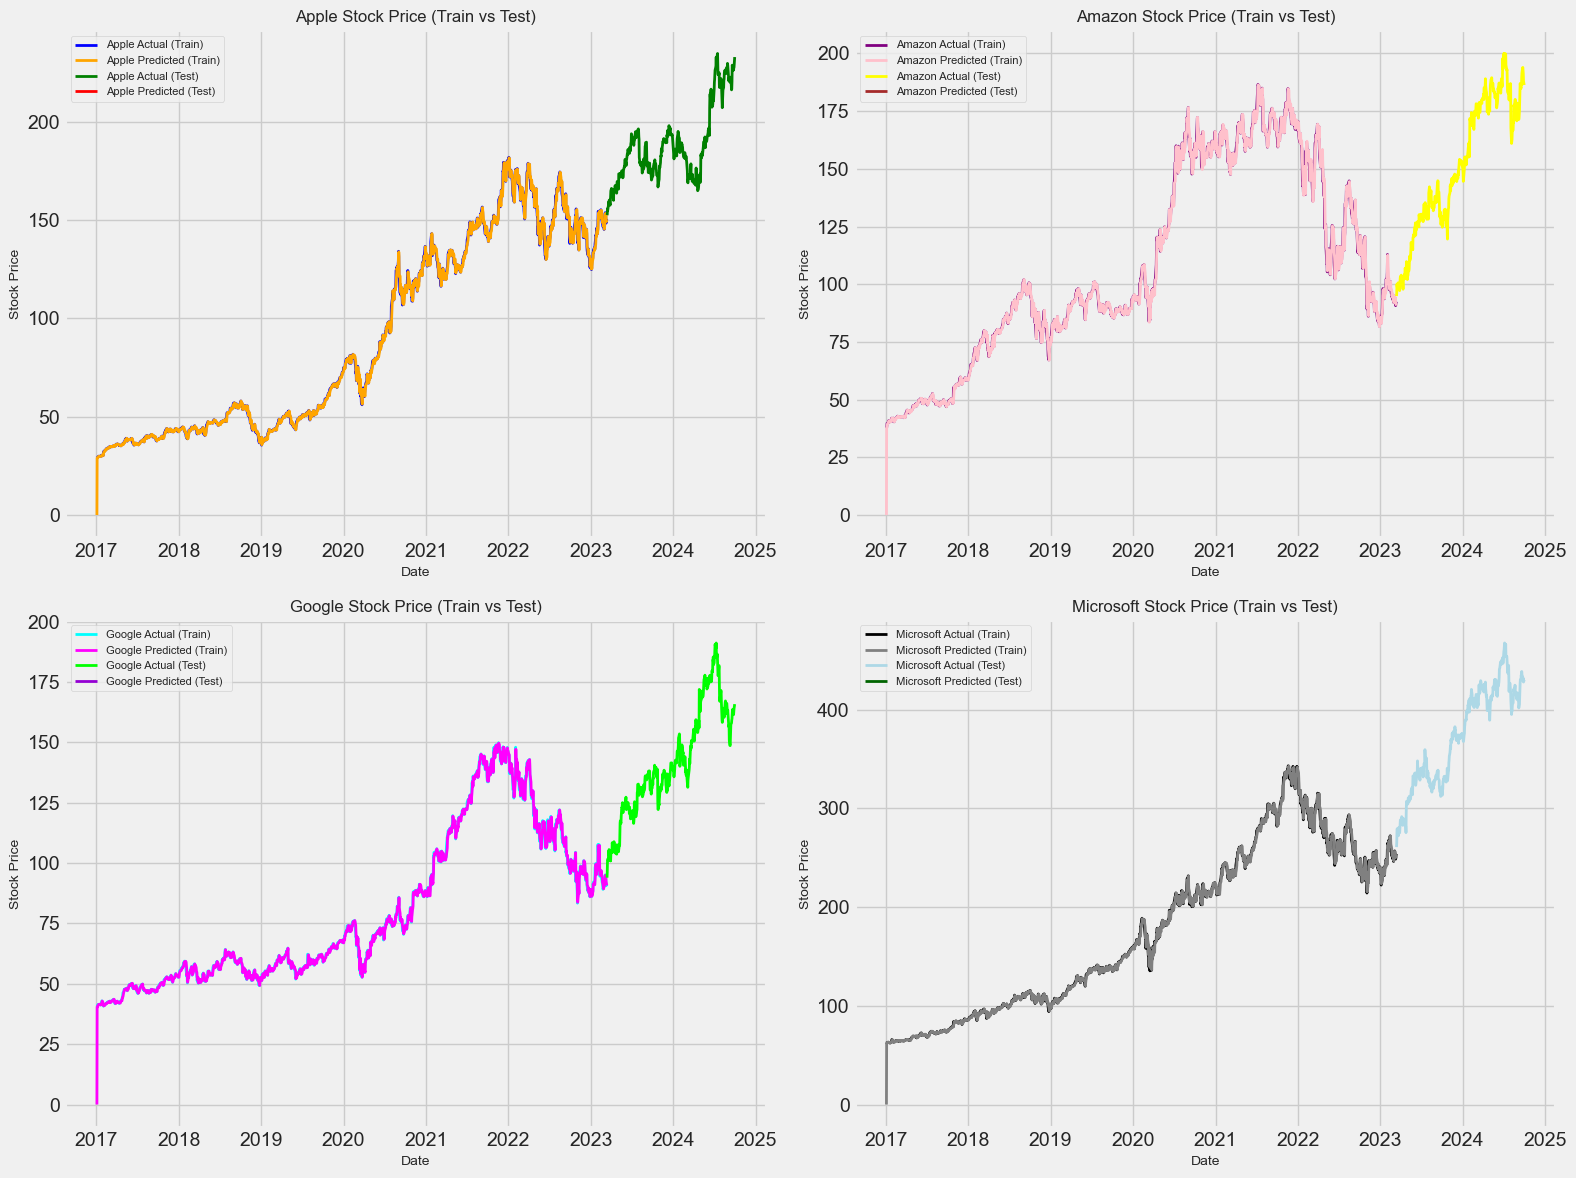

In [53]:
# Create a figure to hold subplots for all companies
plt.figure(figsize=(16, 12))

# Define colors for each company
company_colors = {
    'Apple': {'actual_train': 'blue', 'pred_train': 'orange', 'actual_test': 'green', 'pred_test': 'red'},
    'Amazon': {'actual_train': 'purple', 'pred_train': 'pink', 'actual_test': 'yellow', 'pred_test': 'brown'},
    'Google': {'actual_train': 'cyan', 'pred_train': 'magenta', 'actual_test': 'lime', 'pred_test': 'darkviolet'},
    'Microsoft': {'actual_train': 'black', 'pred_train': 'gray', 'actual_test': 'lightblue', 'pred_test': 'darkgreen'}
}

# Loop through each company and plot its data
for idx, company in enumerate(companies):
    # Check if company data is available in results
    if company not in results or 'original_data' not in results[company]:
        print(f"Data for {company} is missing. Skipping.")
        continue
    
    # Get the original data as a DataFrame to access dates
    company_data = results[company]['original_data']
    dates = pd.to_datetime(company_data.index)
    train_size = len(results[company]['arima_train_pred'])
    
    # Split the data into training and testing sets
    y_train_actual = company_data['Close'][:train_size]
    y_test_actual = company_data['Close'][train_size:]
    
    # Get ARIMA predictions as Series with corresponding dates for alignment
    arima_train_pred = pd.Series(results[company]['arima_train_pred'], index=dates[:train_size])
    arima_test_pred = pd.Series(results[company]['arima_test_pred'], index=dates[train_size:])
    
    # Create subplots for each company
    plt.subplot(2, 2, idx + 1)  # 2x2 grid for the companies

    # Plot training actual and predicted data
    plt.plot(dates[:train_size], y_train_actual, label=f'{company} Actual (Train)', 
             color=company_colors[company]['actual_train'], linewidth=2)
    plt.plot(dates[:train_size], arima_train_pred, label=f'{company} Predicted (Train)', 
             color=company_colors[company]['pred_train'], linewidth=2)
    
    # Plot testing actual and predicted data
    plt.plot(dates[train_size:], y_test_actual, label=f'{company} Actual (Test)', 
             color=company_colors[company]['actual_test'], linewidth=2)
    plt.plot(dates[train_size:], arima_test_pred, label=f'{company} Predicted (Test)', 
             color=company_colors[company]['pred_test'], linewidth=2)

    # Add titles and labels
    plt.title(f"{company} Stock Price (Train vs Test)", fontsize=12)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Stock Price', fontsize=10)
    plt.legend(loc='best', fontsize=8)
    plt.grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


## 3. Prophet Model

In [55]:
!pip install prophet

In [56]:
# Prepare data for Prophet
for company in companies:
    company_data = results[company]['original_data']['Close']

    # Create a DataFrame with the correct format for Prophet
    df = pd.DataFrame({
        'ds': results[company]['original_data'].index,  # Date column
        'y': company_data  # Stock price (target variable)
    })

    # Manually split data into training and testing
    train_size = int(len(df) * 0.8)
    df_train = df[:train_size]
    df_test = df[train_size:]

    # Store the training and test data in the results dictionary
    results[company]['prophet_train_data'] = df_train
    results[company]['prophet_test_data'] = df_test
    # Define the Prophet model
    prophet_model = Prophet()

    # Fit the model on training data
    prophet_model.fit(df_train)

    # Generate future dates (same length as test data)
    # This ensures future dates are generated starting after the last date in the training data
    future = prophet_model.make_future_dataframe(periods=len(df_test))

    # Make predictions
    forecast = prophet_model.predict(future)

    # Extract the predicted values for training and test periods
    train_pred = forecast['yhat'][:len(df_train)]
    test_pred = forecast['yhat'][-len(df_test):]

    # Store predictions in results
    results[company]['prophet_train_pred'] = train_pred
    results[company]['prophet_test_pred'] = test_pred

    print(f"Prophet model trained and predictions made for {company}")
        # Get actual values for evaluation
    y_train_actual = df_train['y']
    y_test_actual = df_test['y']

    # Evaluation metrics for training data
    train_mae = mean_absolute_error(y_train_actual, train_pred)
    train_mse = mean_squared_error(y_train_actual, train_pred)
    train_rmse = np.sqrt(train_mse)

    # Evaluation metrics for test data
    test_mae = mean_absolute_error(y_test_actual, test_pred)
    test_mse = mean_squared_error(y_test_actual, test_pred)
    test_rmse = np.sqrt(test_mse)

    # Store evaluation metrics in results
    results[company]['prophet_train_mae'] = train_mae
    results[company]['prophet_train_mse'] = train_mse
    results[company]['prophet_train_rmse'] = train_rmse
    results[company]['prophet_test_mae'] = test_mae
    results[company]['prophet_test_mse'] = test_mse
    results[company]['prophet_test_rmse'] = test_rmse
    # Print the evaluation metrics for each company
    print(f"Company: {company}")
    print(f"Training Data - MAE: {train_mae}, MSE: {train_mse}, RMSE: {train_rmse}")
    print(f"Test Data - MAE: {test_mae}, MSE: {test_mse}, RMSE: {test_rmse}")
    print("-" * 50)


14:51:18 - cmdstanpy - INFO - Chain [1] start processing
14:51:19 - cmdstanpy - INFO - Chain [1] done processing
14:51:19 - cmdstanpy - INFO - Chain [1] start processing


Prophet model trained and predictions made for Apple
Company: Apple
Training Data - MAE: 4.608105808252323, MSE: 35.80030512670651, RMSE: 5.983335618758696
Test Data - MAE: 60.48184596425266, MSE: 4237.741100871618, RMSE: 65.09793468975508
--------------------------------------------------


14:51:20 - cmdstanpy - INFO - Chain [1] done processing
14:51:20 - cmdstanpy - INFO - Chain [1] start processing


Prophet model trained and predictions made for Amazon
Company: Amazon
Training Data - MAE: 5.475748800772034, MSE: 54.01791491085921, RMSE: 7.349688082555559
Test Data - MAE: 104.46627508489688, MSE: 13340.757054899683, RMSE: 115.5021950219981
--------------------------------------------------


14:51:20 - cmdstanpy - INFO - Chain [1] done processing
14:51:21 - cmdstanpy - INFO - Chain [1] start processing


Prophet model trained and predictions made for Google
Company: Google
Training Data - MAE: 2.991366811551286, MSE: 15.267602173965596, RMSE: 3.9073779154268653
Test Data - MAE: 83.6042950025396, MSE: 8226.079955327683, RMSE: 90.69773952711105
--------------------------------------------------


14:51:21 - cmdstanpy - INFO - Chain [1] done processing


Prophet model trained and predictions made for Microsoft
Company: Microsoft
Training Data - MAE: 6.707426860783698, MSE: 86.46183306787871, RMSE: 9.29848552549708
Test Data - MAE: 185.37019387350114, MSE: 39328.152894458064, RMSE: 198.31326958743347
--------------------------------------------------


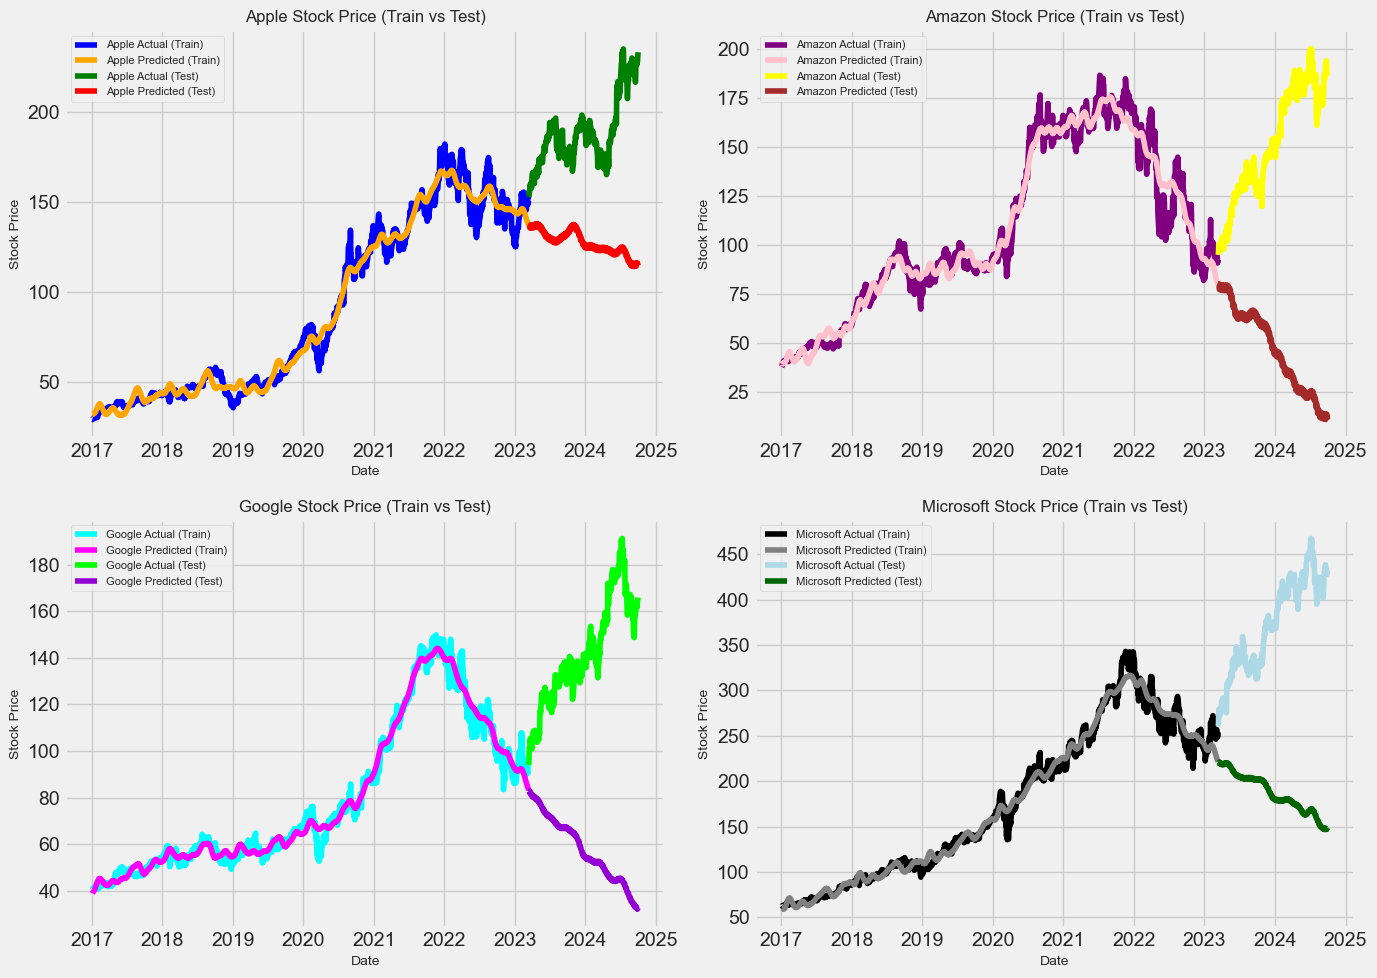

In [57]:
# Create a figure to hold subplots for all companies
plt.figure(figsize=(14, 10))

# Define colors for each company
company_colors = {
    'Apple': {'actual_train': 'blue', 'pred_train': 'orange', 'actual_test': 'green', 'pred_test': 'red'},
    'Amazon': {'actual_train': 'purple', 'pred_train': 'pink', 'actual_test': 'yellow', 'pred_test': 'brown'},
    'Google': {'actual_train': 'cyan', 'pred_train': 'magenta', 'actual_test': 'lime', 'pred_test': 'darkviolet'},
    'Microsoft': {'actual_train': 'black', 'pred_train': 'gray', 'actual_test': 'lightblue', 'pred_test': 'darkgreen'}
}

# Loop through each company and plot its data
for idx, company in enumerate(companies):
    # Get the actual and predicted data
    df_train = results[company]['prophet_train_data']
    df_test = results[company]['prophet_test_data']
    prophet_train_pred = results[company]['prophet_train_pred']
    prophet_test_pred = results[company]['prophet_test_pred']

    # Create subplots for each company
    plt.subplot(2, 2, idx + 1)  # 2x2 grid for the companies

    # Plot training and test actual/predicted data
    plt.plot(df_train['ds'], df_train['y'], label=f'{company} Actual (Train)', color=company_colors[company]['actual_train'])
    plt.plot(df_train['ds'], prophet_train_pred, label=f'{company} Predicted (Train)', color=company_colors[company]['pred_train'])
    plt.plot(df_test['ds'], df_test['y'], label=f'{company} Actual (Test)', color=company_colors[company]['actual_test'])
    plt.plot(df_test['ds'], prophet_test_pred, label=f'{company} Predicted (Test)', color=company_colors[company]['pred_test'])

    # Add titles and labels
    plt.title(f"{company} Stock Price (Train vs Test)", fontsize=12)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel('Stock Price', fontsize=10)
    plt.legend(loc='best', fontsize=8)
    plt.grid(True)

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()
